# TP2 PROCESAMIENTO DEL HABLA

## Nicolas Garcia


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [1]:
! pip install requests beautifulsoup4 html5lib

In [2]:

import requests
from bs4 import BeautifulSoup


url = "https://academy.bit2me.com/whitepaper-bitcoin-en-espanol/"

# Realizar la solicitud HTTP
respuesta = requests.get(url)
respuesta.raise_for_status()

In [3]:
# Analizar el contenido HTML de la página
sopa = BeautifulSoup(respuesta.text, 'html.parser')


In [4]:
# Buscamos el h3 que queremos copiar
h3 = sopa.find("h3", string="Introducción")

if h3:
    contenido = [] #aca guardamos todo el texto que viene despues del titulo que le indicamos
    for sibling in h3.next_siblings: #esto recorre todo lo que haya en el html despues de nuestro h3
        if sibling.name == "h3":  # hasta el siguiente h3
            break
        if hasattr(sibling, "get_text"):  # solo etiquetas con texto
            contenido.append(sibling.get_text(strip=True))
    print("\n".join(contenido))
else:
    print("No se encontró ese h3.")


El comercio en Internet ha llegado exclusivamente a depender de las instituciones financieras, las cuales sirven como terceros de confianza, para el procesamiento de los pagos electrónicos. Mientras que el sistema funciona suficientemente bien para la mayoría de las transacciones, aún sufre de las debilidades inherentes del modelo basado en confianza.Las transacciones completamente no reversibles no son realmente posibles, debido a que las instituciones financieras no pueden evitar la mediación en disputas.

El costo de la mediación incrementa los costos de transacción. Con ello se limita el tamaño mínimo práctico por transacción y se elimina la posibilidad de realizar pequeñas transacciones casuales, existiendo un costo mayor por esta pérdida y la imposibilidad de hacer pagos no reversibles por servicios no reversibles. Con la posibilidad de revertir, la necesidad de confianza se expande. Los comerciantes deben cuidar a sus clientes, molestándoles solicitando más información de la qu

## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [5]:
!pip install spacy

In [6]:
!python -m spacy download es_core_news_sm

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.12/dist-packages/spacy/__init__.py", line 6, in <module>
  File "/usr/local/lib/python3.12/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.12/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "/usr/local/lib/python3.12/dist-packages/thinc/__init__.py", line 5, in <module>
    from .config import registry
  File "/usr/local/lib/python3.12/dist-packages/thinc/config.py", line 5, in <module>
    from .types import Decorator
  File "/usr/local/lib/python3.12/dist-packages/thinc/types.py", line 27, in <module>
    from .compat import cupy, has_cupy
  File "/usr/local/lib/python3.12/dist-packages/thinc/compat.py", line 35, in <module>
    impor

In [8]:
import spacy

# Cargamos el modelo en español
nlp = spacy.load("es_core_news_sm")

texto = "\n".join(contenido) #esto junta todos los parrafos en un solo bloque asi pasa como un solo string

# Procesamos el texto
doc = nlp(texto)

# Lista de stop words encontradas en el texto
stopwords_en_texto = [token.text for token in doc if token.is_stop]

print("Stop words encontradas:", stopwords_en_texto)

Stop words encontradas: ['El', 'en', 'ha', 'a', 'de', 'las', 'las', 'cuales', 'como', 'de', 'para', 'el', 'de', 'los', 'Mientras', 'que', 'el', 'bien', 'para', 'la', 'de', 'las', 'aún', 'de', 'las', 'del', 'en', 'Las', 'no', 'no', 'son', 'debido', 'a', 'que', 'las', 'no', 'pueden', 'la', 'en', 'El', 'de', 'la', 'los', 'de', 'Con', 'ello', 'se', 'el', 'por', 'y', 'se', 'la', 'de', 'realizar', 'un', 'mayor', 'por', 'esta', 'y', 'la', 'de', 'hacer', 'no', 'por', 'no', 'Con', 'la', 'de', 'la', 'de', 'se', 'Los', 'deben', 'a', 'sus', 'más', 'de', 'la', 'que', 'se', 'de', 'otro', 'modo', 'Un', 'cierto', 'de', 'se', 'como', 'Estos', 'e', 'en', 'los', 'se', 'pueden', 'si', 'la', 'Pero', 'no', 'existe', 'un', 'para', 'hacer', 'por', 'un', 'de', 'sin', 'un', 'tercero', 'Lo', 'que', 'se', 'es', 'un', 'de', 'que', 'en', 'en', 'vez', 'de', 'en', 'Con', 'ello', 'se', 'a', 'las', 'dos', 'realizar', 'sin', 'la', 'de', 'un', 'tercero', 'Las', 'que', 'son', 'poco', 'de', 'a', 'los', 'de', 'Y', 'del', 'm

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [9]:
palabras_limpias = [
    token.text.lower()  # todo a minúscula
    for token in doc
    if not token.is_stop          # sacamos stop words
    and token.is_alpha            # sacamos numeros y signos si los hubiera
]

# unimos de nuevo en un texto limpio
texto_limpio = " ".join(palabras_limpias)

print("Texto limpio:")
print(texto_limpio)

Texto limpio:
comercio internet llegado exclusivamente depender instituciones financieras sirven terceros confianza procesamiento pagos electrónicos sistema funciona suficientemente mayoría transacciones sufre debilidades inherentes modelo basado confianza transacciones completamente reversibles realmente posibles instituciones financieras evitar mediación disputas costo mediación incrementa costos transacción limita tamaño mínimo práctico transacción elimina posibilidad pequeñas transacciones casuales existiendo costo pérdida imposibilidad pagos reversibles servicios reversibles posibilidad revertir necesidad confianza expande comerciantes cuidar clientes molestándoles solicitando información necesitaría porcentaje fraude acepta inevitable costos incertidumbres pagos evitar persona utiliza dinero físico mecanismo pagos canal comunicación confiable necesita sistema pagos electrónicos esté basado pruebas criptográficas confianza busca permitir partes interesadas transacciones directamen

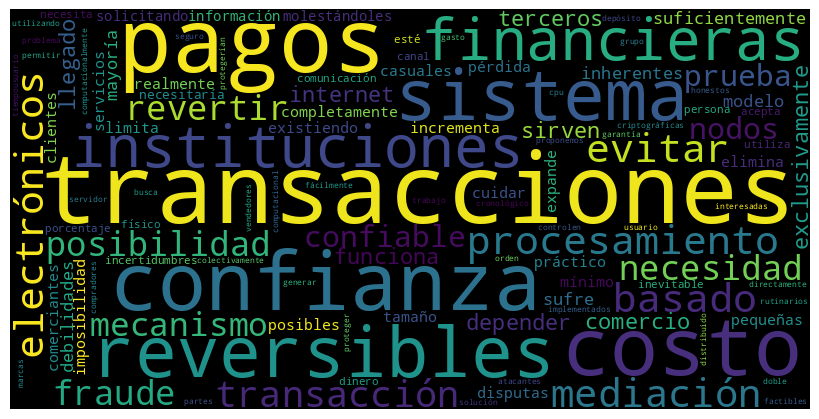

In [19]:
# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto de ejemplo
text = texto_limpio
# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

oraciones_limpias = []
for sent in doc.sents:  # esto divide el texto en oraciones
    tokens = [
        token.text.lower()
        for token in sent
        if token.is_alpha and not token.is_stop  # quita stop words
    ]
    if tokens:  # si no quedó vacía
        oraciones_limpias.append(" ".join(tokens))

print("Oraciones limpias:")
for i, oracion in enumerate(oraciones_limpias[:5], 1):
    print(f"{i}. {oracion}")

# hacemos la matriz vocabulario
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(oraciones_limpias)

# Mostrar vocabulario
print("\nVocabulario:")
print(vectorizer.get_feature_names_out())

# Mostrar matriz documento-vocabulario
print("\nMatriz documento-vocabulario (Bag of Words):")
print(X.toarray())

Oraciones limpias:
1. comercio internet llegado exclusivamente depender instituciones financieras sirven terceros confianza procesamiento pagos electrónicos
2. sistema funciona suficientemente mayoría transacciones sufre debilidades inherentes modelo basado confianza
3. transacciones completamente reversibles realmente posibles instituciones financieras evitar mediación disputas
4. costo mediación incrementa costos transacción
5. limita tamaño mínimo práctico transacción elimina posibilidad pequeñas transacciones casuales existiendo costo pérdida imposibilidad pagos reversibles servicios reversibles

Vocabulario:
['acepta' 'atacantes' 'basado' 'busca' 'canal' 'casuales' 'clientes'
 'colectivamente' 'comerciantes' 'comercio' 'completamente' 'compradores'
 'computacional' 'computacionalmente' 'comunicación' 'confiable'
 'confianza' 'controlen' 'costo' 'costos' 'cpu' 'criptográficas'
 'cronológico' 'cuidar' 'debilidades' 'depender' 'depósito' 'dinero'
 'directamente' 'disputas' 'distribui


#### 2.3.2 Determina la longitud de tu vocabulario.

In [21]:
# Vocabulario completo
vocabulario = vectorizer.get_feature_names_out() #esto nos da la lista de todas las palabras del vocabulario

# Longitud del vocabulario
longitud_vocab = len(vocabulario) #con esto las contamos

print("Vocabulario:", vocabulario)
print("Longitud del vocabulario:", longitud_vocab)

Vocabulario: ['acepta' 'atacantes' 'basado' 'busca' 'canal' 'casuales' 'clientes'
 'colectivamente' 'comerciantes' 'comercio' 'completamente' 'compradores'
 'computacional' 'computacionalmente' 'comunicación' 'confiable'
 'confianza' 'controlen' 'costo' 'costos' 'cpu' 'criptográficas'
 'cronológico' 'cuidar' 'debilidades' 'depender' 'depósito' 'dinero'
 'directamente' 'disputas' 'distribuido' 'doble' 'electrónicos' 'elimina'
 'esté' 'evitar' 'exclusivamente' 'existiendo' 'expande' 'factibles'
 'financieras' 'fraude' 'funciona' 'fácilmente' 'físico' 'garantía'
 'gasto' 'generar' 'grupo' 'honestos' 'implementados' 'imposibilidad'
 'incertidumbres' 'incrementa' 'inevitable' 'información' 'inherentes'
 'instituciones' 'interesadas' 'internet' 'limita' 'llegado' 'marcas'
 'mayoría' 'mecanismo' 'mecanismos' 'mediación' 'modelo' 'molestándoles'
 'mínimo' 'necesidad' 'necesita' 'necesitaría' 'nodos' 'orden' 'pagos'
 'partes' 'pequeñas' 'permitir' 'persona' 'porcentaje' 'posibilidad'
 'posibles


#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #crea la representación TF-IDF
X_tfidf = vectorizer.fit_transform(oraciones_limpias) #transforma las oraciones en vectores

print("\nMatriz TF-IDF:")
print(X_tfidf.toarray()) #convierte la matriz dispersa a un array para poder verla
#cada celda representa la importancia realtiva de la palabra en la matriz


Matriz TF-IDF:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.28667565 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.23999905 0.        ]
 [0.         0.28437493 0.         ... 0.         0.         0.        ]]


# Conclusiones



muy interesante trabajo, lo resolvi con material de ejemplo, de clase, algunos videos de youtube y tambien inteligencia artificial

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [10]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
